In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### brain_volume_ratio_to_baseline_____VS_____diagnosischanges from every visit


#### sleep_brain_dxch.csv
#### 

In [24]:
com_col = ['Phase', 'RID', 'VISCODE','PTID']
target = 'DXCHANGE'

In [25]:
sleep_brain_dxch = pd.read_csv('sleep_brain_dxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_dxch = sleep_brain_dxch[sleep_brain_dxch[target].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_dxch

,RID,Phase,VISCODE,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI1,m06,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI1,m36,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI1,m60,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI1,m66,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ADNI1,m72,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19432,7083,ADNI3,sc,126_S_7083,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19433,7085,ADNI3,sc,941_S_7085,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19434,7088,ADNI3,sc,033_S_7088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19435,7092,ADNI3,sc,021_S_7092,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sleep_brain_dxch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19437 entries, 0 to 19436
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RID                             19437 non-null  int64  
 1   Phase                           19437 non-null  object 
 2   VISCODE                         17886 non-null  object 
 3   PTID                            19350 non-null  object 
 4   NPIK1                           924 non-null    float64
 5   NPIK2                           923 non-null    float64
 6   NPIK3                           922 non-null    float64
 7   NPIK4                           922 non-null    float64
 8   NPIK5                           922 non-null    float64
 9   NPIK6                           923 non-null    float64
 10  NPIK7                           923 non-null    float64
 11  NPIK8                           921 non-null    float64
 12  NPIK9A                          

In [27]:
sleep_brain_dxch.columns

Index(['RID', 'Phase', 'VISCODE', 'PTID', 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4',
       'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C',
       'NPIKTOT', 'insomnia', 'OSA', 'DXCHANGE', 'ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year'],
      dtype='object')

### brain_biomarker______VS______DXCHANGE

In [28]:
col_lst = [ 'DXCHANGE','ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
bio_lst = [ 'ratio_ABETA_bl', 'ratio_TAU_bl','ratio_PTAU_bl']
brain_dxch = sleep_brain_dxch[com_col + col_lst].set_index(['Phase', 'RID', 'VISCODE','PTID']).dropna(how='any',axis=0).reset_index()
#biomarkers to dxch
bio_dxch = sleep_brain_dxch[com_col + bio_lst].set_index(['Phase', 'RID', 'VISCODE','PTID']).dropna(how='any',axis=0).reset_index()
df = brain_dxch.copy()

In [29]:
np.sum(df.isna())   # check nan

Phase                             0
RID                               0
VISCODE                           0
PTID                              0
DXCHANGE                          0
ratio_Ventricles_bl               0
ratio_Hippocampus_bl              0
ratio_WholeBrain_bl               0
ratio_Entorhinal_bl               0
ratio_Fusiform_bl                 0
Ventricles_reduction_per_year     0
Hippocampus_reduction_per_year    0
wholebrain_reduction_per_year     0
Entorhinal_reduction_per_year     0
Fusiform_reduction_per_year       0
ICV_reduction_per_year            0
dtype: int64

In [30]:
df.groupby(target).count()

,Phase,RID,VISCODE,PTID,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
DXCHANGE,,,,,,,,,,,,,,,
AD-AD,406,406,406,406,406,406,406,406,406,406,406,406,406,406,406
AD-MCI,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CN-AD,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
CN-CN,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561,1561
CN-MCI,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
MCI-AD,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471
MCI-CN,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
MCI-MCI,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819,1819


- try different combinations

In [31]:
# to distinguish MCI to AD or stay in MCI   --> As the previous challenge group used
df_2g = df.loc[df[target].isin(['MCI-AD','MCI-MCI'])].reset_index().drop(['index'],axis=1)
df_2g.shape

(2290, 16)

In [32]:
# to distinguish MCI to AD or stay in MCI or get back to CN
df_3g = df.loc[df[target].isin([ 'MCI-MCI', 'MCI-AD', 'MCI-CN',])].reset_index().drop(['index'],axis=1)
df_3g.shape

(2422, 16)

In [33]:
# to distinguish CN to MCI or stay in CN
df_2gg = df.loc[df[target].isin(['CN-MCI', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df_2gg.shape

(1664, 16)

In [34]:
# combination bl of CN or MCI, 5 groups
df_5g = df.loc[brain_dxch[target].isin(['CN-MCI', 'MCI-MCI', 'MCI-AD', 'MCI-CN','CN-CN'])].reset_index().drop(['index'],axis=1)
df_5g.shape

(4086, 16)

In [35]:
# 6 labels
df_6g = df.loc[brain_dxch[target].isin(['CN-MCI', 'AD-AD', 'MCI-MCI', 'MCI-AD', 'MCI-CN','CN-CN'])].reset_index().drop(['index'],axis=1)
df_6g.shape

(4492, 16)

### undersampling and modeling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [14]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID',target]

k=10

# - 'MCI-AD': 471, 'MCI-MCI': 471

-  MCI-AD': 471, 'MCI-MCI': 471
- original dataset: random forest 90trees. f1-score on training data: 1.000 f1-score on test data: 0.783, 10-fold cross validation

In [15]:
models(df_2g,drop_lst,target)

After undersampling data size is 942 ; Resampled dataset shape Counter({'MCI-AD': 471, 'MCI-MCI': 471})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.673, Test set f1-score: 0.640
          - saga_L1, Training set f1-score:0.660, Test set f1-score: 0.692
          - newton-cg_L2, Training set f1-score:0.673, Test set f1-score: 0.640
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.753, Test set f1-score: 0.736
          - saga_L1, Training set f1-score:0.673, Test set f1-score: 0.640
          - newton-cg_L2, Training set f1-score:0.753, Test set f1-score: 0.736
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.729, Test set f1-score: 0.758
          - saga_L1, Training set f1-score:0.734, Test set f1-score: 0.743
    

          - 5trees. f1-score on training data: 0.955 f1-score on test data: 0.719
          - 10trees. f1-score on training data: 0.992 f1-score on test data: 0.709
          - 15trees. f1-score on training data: 0.993 f1-score on test data: 0.725
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.735
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.741
          - 30trees. f1-score on training data: 0.999 f1-score on test data: 0.735
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.751
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.741
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.746
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.741
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.751
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.741
     

In [16]:
cv_models(df_2g,drop_lst,target,k)

After undersampling data size is 942 ; Resampled dataset shape Counter({'MCI-AD': 471, 'MCI-MCI': 471})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.710
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.710
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.722
          - saga_L1, average weighted f1-score of 10-cross validation:0.332
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.722
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.726
          - saga_L1, average weighted f1-score of 10-cross validation:0.714
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.726
       - C = 1
          

          - 25trees. average weighted f1-score of 10-cross validation:0.759
          - 30trees. average weighted f1-score of 10-cross validation:0.753
          - 35trees. average weighted f1-score of 10-cross validation:0.759
          - 40trees. average weighted f1-score of 10-cross validation:0.753
          - 45trees. average weighted f1-score of 10-cross validation:0.762
          - 50trees. average weighted f1-score of 10-cross validation:0.762
          - 55trees. average weighted f1-score of 10-cross validation:0.768
          - 60trees. average weighted f1-score of 10-cross validation:0.765
          - 65trees. average weighted f1-score of 10-cross validation:0.765
          - 70trees. average weighted f1-score of 10-cross validation:0.766
          - 75trees. average weighted f1-score of 10-cross validation:0.766
          - 80trees. average weighted f1-score of 10-cross validation:0.766
          - 85trees. average weighted f1-score of 10-cross validation:0.768
          - 

- Model selection:
- original data, 10 fold-cv, randomforest: 90trees. average weighted f1-score of 10-cross validation:0.773

After undersampling data size is 942 ; Resampled dataset shape Counter({'MCI-AD': 471, 'MCI-MCI': 471})

6 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
ratio_Ventricles_bl,0.159327,0.150249,0.161043,0.158686,0.162715,0.165677,0.161178,0.165262,0.162972,0.155120,0.150366
ratio_Hippocampus_bl,0.136827,0.132538,0.126803,0.142874,0.130629,0.133816,0.136048,0.142395,0.133748,0.137447,0.151971
Hippocampus_reduction_per_year,0.110770,0.113573,0.117683,0.112072,0.116511,0.101235,0.116737,0.117184,0.114376,0.094910,0.103424
ratio_Fusiform_bl,0.107950,0.092536,0.102520,0.118003,0.117854,0.108285,0.101563,0.104112,0.122760,0.103169,0.108697
Ventricles_reduction_per_year,0.092217,0.096775,0.106862,0.087076,0.086821,0.093955,0.092730,0.088357,0.098058,0.092347,0.079186
ratio_Entorhinal_bl,0.087345,0.098311,0.083478,0.080500,0.079974,0.088015,0.089990,0.085536,0.076976,0.101989,0.088680
ratio_WholeBrain_bl,0.069830,0.077025,0.067839,0.065892,0.067477,0.069879,0.067455,0.059750,0.064027,0.074751,0.084202
Fusiform_reduction_per_year,0.064822,0.068592,0.064572,0.061275,0.066789,0.068943,0.062853,0.065817,0.062617,0.065568,0.061190
Entorhinal_reduction_per_year,0.060557,0.057141,0.059594,0.063062,0.060453,0.062120,0.058626,0.066534,0.058880,0.060128,0.059028
wholebrain_reduction_per_year,0.060458,0.062661,0.058545,0.062129,0.058832,0.058018,0.059964,0.055737,0.058003,0.066587,0.064106


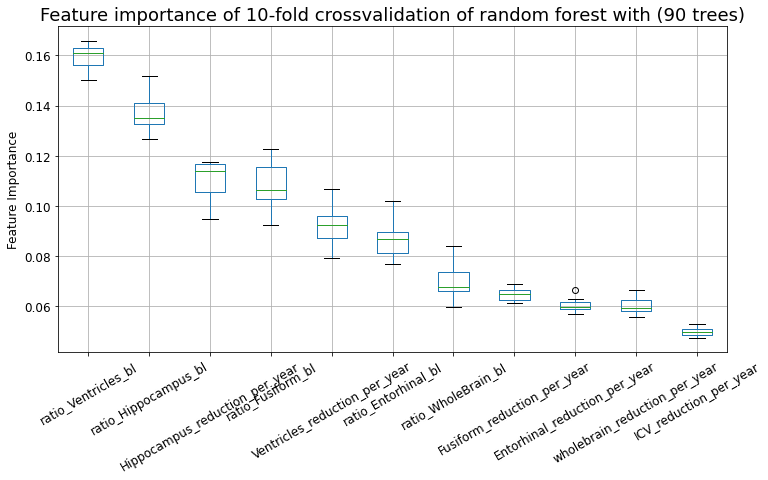

In [17]:
res = usampling_scale_data(df_2g,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators =90, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (90 trees)'
feature_importance(X,y,clf,10,title_label)

- 'MCI-AD': 132, 'MCI-CN': 132, 'MCI-MCI': 132}

In [21]:
models(df_3g,drop_lst,target)

After undersampling data size is 396 ; Resampled dataset shape Counter({'MCI-AD': 132, 'MCI-CN': 132, 'MCI-MCI': 132})

4 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.515, Test set f1-score: 0.431
          - saga_L1, Training set f1-score:0.484, Test set f1-score: 0.559
          - newton-cg_L2, Training set f1-score:0.515, Test set f1-score: 0.431
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.566, Test set f1-score: 0.560
          - saga_L1, Training set f1-score:0.499, Test set f1-score: 0.505
          - newton-cg_L2, Training set f1-score:0.566, Test set f1-score: 0.560
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.634, Test set f1-score: 0.581
          - saga_L1, Training set f1-score:0.635, Test set f1-sc

          - 15trees. f1-score on training data: 1.000 f1-score on test data: 0.559
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.584
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.584
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.585
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.529
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.570
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.558
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.559
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.557
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.555
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.566
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.566
    

In [20]:
cv_models(df_3g,drop_lst,target,k)

After undersampling data size is 396 ; Resampled dataset shape Counter({'MCI-AD': 132, 'MCI-CN': 132, 'MCI-MCI': 132})

4 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.417
          - saga_L1, average weighted f1-score of 10-cross validation:0.167
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.417
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.467
          - saga_L1, average weighted f1-score of 10-cross validation:0.165
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.467
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.538
          - saga_L1, average weighted f1-score of 10-cross validation:0.394
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.538
       - C

          - 25trees. average weighted f1-score of 10-cross validation:0.609
          - 30trees. average weighted f1-score of 10-cross validation:0.627
          - 35trees. average weighted f1-score of 10-cross validation:0.620
          - 40trees. average weighted f1-score of 10-cross validation:0.613
          - 45trees. average weighted f1-score of 10-cross validation:0.609
          - 50trees. average weighted f1-score of 10-cross validation:0.618
          - 55trees. average weighted f1-score of 10-cross validation:0.621
          - 60trees. average weighted f1-score of 10-cross validation:0.610
          - 65trees. average weighted f1-score of 10-cross validation:0.618
          - 70trees. average weighted f1-score of 10-cross validation:0.621
          - 75trees. average weighted f1-score of 10-cross validation:0.610
          - 80trees. average weighted f1-score of 10-cross validation:0.612
          - 85trees. average weighted f1-score of 10-cross validation:0.606
          - 

- original or scaled data: random forest 30trees. average weighted f1-score of 10-cross validation:0.627

After undersampling data size is 396 ; Resampled dataset shape Counter({'MCI-AD': 132, 'MCI-CN': 132, 'MCI-MCI': 132})

4 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
ratio_Hippocampus_bl,0.124549,0.122110,0.116214,0.131494,0.136193,0.139762,0.118202,0.120004,0.102687,0.130473,0.128354
Hippocampus_reduction_per_year,0.108513,0.085286,0.107931,0.101582,0.109126,0.109992,0.117168,0.115306,0.114860,0.106536,0.117341
ratio_Entorhinal_bl,0.106374,0.114105,0.118017,0.112337,0.115996,0.098517,0.107383,0.088107,0.112095,0.109109,0.088072
ratio_Fusiform_bl,0.102563,0.118434,0.098382,0.082986,0.094712,0.094583,0.094412,0.103554,0.108425,0.109221,0.120918
ratio_Ventricles_bl,0.094203,0.093300,0.082849,0.100494,0.096691,0.092296,0.103198,0.105678,0.095929,0.082769,0.088828
ratio_WholeBrain_bl,0.087327,0.091245,0.106766,0.090611,0.082742,0.090013,0.075761,0.085319,0.082153,0.083304,0.085357
Ventricles_reduction_per_year,0.082279,0.068089,0.075398,0.072277,0.079202,0.088894,0.086707,0.084244,0.086719,0.087293,0.093967
Entorhinal_reduction_per_year,0.081048,0.087413,0.079996,0.086204,0.086039,0.077916,0.085950,0.085021,0.084262,0.075499,0.062179
wholebrain_reduction_per_year,0.077152,0.075091,0.069557,0.085270,0.069682,0.071551,0.077238,0.081795,0.075465,0.078956,0.086913
ICV_reduction_per_year,0.070679,0.080197,0.070352,0.068340,0.078641,0.073645,0.068021,0.064909,0.068226,0.065537,0.068926


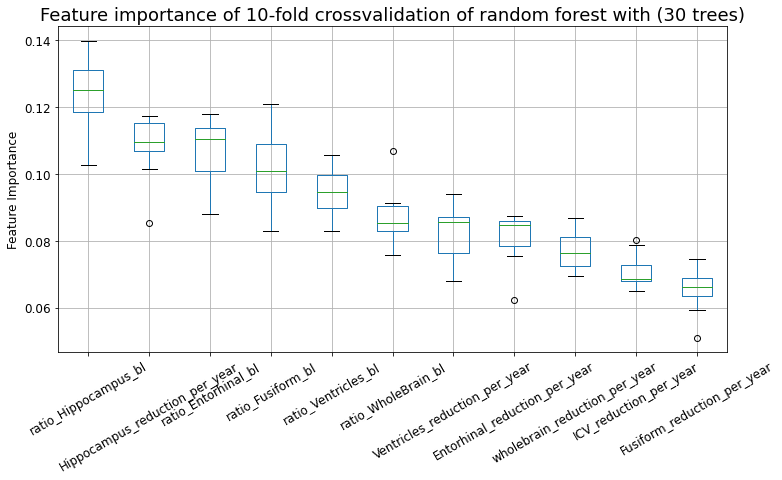

In [38]:
res = usampling_scale_data(df_3g,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators = 30, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (30 trees)'
feature_importance(X,y,clf,k,title_label)

- 'CN-CN': 103, 'CN-MCI': 103

In [41]:
models(df_2gg,drop_lst,target)

After undersampling data size is 206 ; Resampled dataset shape Counter({'CN-CN': 103, 'CN-MCI': 103})

5 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.677, Test set f1-score: 0.623
          - saga_L1, Training set f1-score:0.677, Test set f1-score: 0.623
          - newton-cg_L2, Training set f1-score:0.677, Test set f1-score: 0.623
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.677, Test set f1-score: 0.623
          - saga_L1, Training set f1-score:0.677, Test set f1-score: 0.623
          - newton-cg_L2, Training set f1-score:0.677, Test set f1-score: 0.623
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.640, Test set f1-score: 0.593
          - saga_L1, Training set f1-score:0.677, Test set f1-score: 0.623
      

          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.666
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.667
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.694
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.691
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.716
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.714
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.691
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.667
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.667
          - 75trees. f1-score on training data: 1.000 f1-score on test data: 0.691
          - 80trees. f1-score on training data: 1.000 f1-score on test data: 0.690
          - 85trees. f1-score on training data: 1.000 f1-score on test data: 0.690
    

In [40]:
cv_models(df_2gg,drop_lst,target,k)

After undersampling data size is 206 ; Resampled dataset shape Counter({'CN-CN': 103, 'CN-MCI': 103})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.413
          - saga_L1, average weighted f1-score of 10-cross validation:0.344
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.413
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.410
          - saga_L1, average weighted f1-score of 10-cross validation:0.328
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.410
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.604
          - saga_L1, average weighted f1-score of 10-cross validation:0.323
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.604
       - C = 1
          - 

          - 25trees. average weighted f1-score of 10-cross validation:0.512
          - 30trees. average weighted f1-score of 10-cross validation:0.523
          - 35trees. average weighted f1-score of 10-cross validation:0.549
          - 40trees. average weighted f1-score of 10-cross validation:0.559
          - 45trees. average weighted f1-score of 10-cross validation:0.563
          - 50trees. average weighted f1-score of 10-cross validation:0.551
          - 55trees. average weighted f1-score of 10-cross validation:0.557
          - 60trees. average weighted f1-score of 10-cross validation:0.554
          - 65trees. average weighted f1-score of 10-cross validation:0.564
          - 70trees. average weighted f1-score of 10-cross validation:0.545
          - 75trees. average weighted f1-score of 10-cross validation:0.555
          - 80trees. average weighted f1-score of 10-cross validation:0.544
          - 85trees. average weighted f1-score of 10-cross validation:0.541
          - 

- pca data, random forest 95trees. average weighted f1-score of 10-cross validation:0.623

In [42]:
res = usampling_scale_data(df_2gg,drop_lst,target)     
X = res[2]
y = res[3]
clf = RandomForestClassifier(n_estimators = 95, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (95 trees)'
feature_importance(X,y,clf,k,title_label)

After undersampling data size is 206 ; Resampled dataset shape Counter({'CN-CN': 103, 'CN-MCI': 103})

6 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

- 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103
- all not so good. No selection

In [43]:
models(df_5g,drop_lst,target)

After undersampling data size is 515 ; Resampled dataset shape Counter({'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103})

4 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.345, Test set f1-score: 0.283
          - saga_L1, Training set f1-score:0.345, Test set f1-score: 0.283
          - newton-cg_L2, Training set f1-score:0.345, Test set f1-score: 0.283
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.404, Test set f1-score: 0.313
          - saga_L1, Training set f1-score:0.345, Test set f1-score: 0.283
          - newton-cg_L2, Training set f1-score:0.404, Test set f1-score: 0.313
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.393, Test set f1-score: 0.368
          - saga_L1, Training set f

          - tree depth: 14.000. f1-score on training data: 0.976 f1-score on test data: 0.224
    - Random forest
          - 5trees. f1-score on training data: 0.912 f1-score on test data: 0.299
          - 10trees. f1-score on training data: 0.978 f1-score on test data: 0.296
          - 15trees. f1-score on training data: 0.993 f1-score on test data: 0.328
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.319
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.339
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.323
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.346
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.344
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.333
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.346
          - 55trees. f1-score on training data: 1.000 f1-

In [44]:
cv_models(df_5g,drop_lst,target,k)

After undersampling data size is 515 ; Resampled dataset shape Counter({'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103})

4 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.218
          - saga_L1, average weighted f1-score of 10-cross validation:0.067
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.218
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.250
          - saga_L1, average weighted f1-score of 10-cross validation:0.063
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.250
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.270
          - saga_L1, average weighted f1-score of 10-cross validation:0.153
          - newton-cg_L2, average weighted f1-score of 10-cros

          - 20trees. average weighted f1-score of 10-cross validation:0.351
          - 25trees. average weighted f1-score of 10-cross validation:0.346
          - 30trees. average weighted f1-score of 10-cross validation:0.347
          - 35trees. average weighted f1-score of 10-cross validation:0.342
          - 40trees. average weighted f1-score of 10-cross validation:0.357
          - 45trees. average weighted f1-score of 10-cross validation:0.345
          - 50trees. average weighted f1-score of 10-cross validation:0.350
          - 55trees. average weighted f1-score of 10-cross validation:0.349
          - 60trees. average weighted f1-score of 10-cross validation:0.359
          - 65trees. average weighted f1-score of 10-cross validation:0.349
          - 70trees. average weighted f1-score of 10-cross validation:0.351
          - 75trees. average weighted f1-score of 10-cross validation:0.360
          - 80trees. average weighted f1-score of 10-cross validation:0.354
          - 

C:\Users\weipi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


          - hidden layer size[20, 20]. average weighted f1-score of 10-cross validation:0.329


- 'AD-AD': 103, 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103

In [45]:
models(df_6g,drop_lst,target)

After undersampling data size is 618 ; Resampled dataset shape Counter({'AD-AD': 103, 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.302, Test set f1-score: 0.216
          - saga_L1, Training set f1-score:0.297, Test set f1-score: 0.241
          - newton-cg_L2, Training set f1-score:0.302, Test set f1-score: 0.216
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.292, Test set f1-score: 0.229
          - saga_L1, Training set f1-score:0.302, Test set f1-score: 0.216
          - newton-cg_L2, Training set f1-score:0.292, Test set f1-score: 0.229
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.338, Test set f1-score: 0.320
          - saga_L1, 

          - 15trees. f1-score on training data: 0.996 f1-score on test data: 0.406
          - 20trees. f1-score on training data: 0.998 f1-score on test data: 0.416
          - 25trees. f1-score on training data: 0.998 f1-score on test data: 0.439
          - 30trees. f1-score on training data: 0.998 f1-score on test data: 0.416
          - 35trees. f1-score on training data: 0.998 f1-score on test data: 0.417
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.445
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.443
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.442
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.445
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.443
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.418
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.421
    

In [46]:
cv_models(df_6g,drop_lst,target,k)

After undersampling data size is 618 ; Resampled dataset shape Counter({'AD-AD': 103, 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.191
          - saga_L1, average weighted f1-score of 10-cross validation:0.047
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.191
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.221
          - saga_L1, average weighted f1-score of 10-cross validation:0.047
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.221
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.236
          - saga_L1, average weighted f1-score of 10-cross validation:0.106
          - newton-cg_L2, average weighted f1-sc

          - 20trees. average weighted f1-score of 10-cross validation:0.335
          - 25trees. average weighted f1-score of 10-cross validation:0.336
          - 30trees. average weighted f1-score of 10-cross validation:0.361
          - 35trees. average weighted f1-score of 10-cross validation:0.337
          - 40trees. average weighted f1-score of 10-cross validation:0.358
          - 45trees. average weighted f1-score of 10-cross validation:0.352
          - 50trees. average weighted f1-score of 10-cross validation:0.351
          - 55trees. average weighted f1-score of 10-cross validation:0.345
          - 60trees. average weighted f1-score of 10-cross validation:0.354
          - 65trees. average weighted f1-score of 10-cross validation:0.355
          - 70trees. average weighted f1-score of 10-cross validation:0.360
          - 75trees. average weighted f1-score of 10-cross validation:0.359
          - 80trees. average weighted f1-score of 10-cross validation:0.347
          - 

C:\Users\weipi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


          - hidden layer size[20, 20]. average weighted f1-score of 10-cross validation:0.255


In [18]:

# feature importance check
def feature_importance(X,y,clf,k,title_label):
    '''
    check the feature importance of the selected classification (decisiontree or random forest) model.
    X: input data
    y: output data
    clf: classification model, e.g.clf = RandomForestClassifier(n_estimators = 90, random_state = 5862) 
    Return
    ------
    dataframe of raw importance info
    boxplot of importance
    '''
    output = cross_validate(clf, X, y, cv=k, scoring = 'f1_weighted', return_estimator =True)
    d = {}  # dictionary to collect all importance dataframes 
    print("Features sorted by their score for each estimator ")
    for idx,estimator in enumerate(output['estimator']):   
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                           index = X.columns,
                                            columns=["importance_%s"% (idx+1)])
        d[idx] = feature_importances  
    df = d[0]  # dataframe to concat all dataframes in d
    for i in range(1,len(d)):
        df = pd.concat([df,d[i]],axis=1)
    df['avg_importance'] = df.mean(axis=1)
    df = df.sort_values(by = ['avg_importance'], ascending = [False])
    # insert avg_importance column as first column
    df.insert(0, 'avg_importance', df.pop('avg_importance'))
    # preparation for plotting
    dff = df.T.reset_index().iloc[1:,1:] 
    # plot feature importance
    bp = dff.boxplot(rot=30,figsize=(12,6),fontsize=12)
    bp.set_ylabel('Feature Importance',fontsize=12)
    bp.set_title('Feature importance of %s'%(title_label),fontsize=18)
    return df